# TM06 embedding(chinese)

# Loading data

In [1]:
import pandas as pd
df = pd.read_csv('data/sentiment.csv')
df.head(5)

tag                                          text
0   P                          店家很給力，快遞也是相當快，第三次光顧啦
1   N  這樣的配置用Vista系統還是有點卡。 指紋收集器。 沒送原裝滑鼠還需要自己買，不太好。
2   P                          不錯，在同等檔次酒店中應該是值得推薦的！
3   N                             哎！ 不會是蒙牛乾的吧 嚴懲真凶！
4   N                   空尤其是三立電視臺女主播做的序尤其無趣像是硬湊那麼多字

In [2]:
print(df.shape)
print(df['tag'].value_counts())

(6388, 2)
N    3347
P    3041
Name: tag, dtype: int64


# Tokenization

In [3]:
import jieba # 結巴斷詞，存成list，放在新的一欄
df['token_text'] = df['text'].apply(lambda x:list(jieba.cut(x)))
df.head(20)

Building prefix dict from the default dictionary ...
Dumping model to file cache C:\Users\SING-H~1\AppData\Local\Temp\jieba.cache
Loading model cost 0.780 seconds.
Prefix dict has been built successfully.


tag                                             text  \
0    P                             店家很給力，快遞也是相當快，第三次光顧啦   
1    N     這樣的配置用Vista系統還是有點卡。 指紋收集器。 沒送原裝滑鼠還需要自己買，不太好。   
2    P                             不錯，在同等檔次酒店中應該是值得推薦的！   
3    N                                哎！ 不會是蒙牛乾的吧 嚴懲真凶！   
4    N                      空尤其是三立電視臺女主播做的序尤其無趣像是硬湊那麼多字   
5    N       明明買了6本書，只到了3本，也沒有說是什麼原因，以後怎麼信的過？？？？？？？？？？？   
6    P                                        看了一下感覺還可以   
7    P       散熱還不錯，玩遊戲cpu溫度和硬碟溫度都在56以下，     速度很好，顯示卡也不錯   
8    P  外觀好看，白色的自己貼紙也方便，vista執行起來速度也還不錯.屬於主流配置了。一般用用可以的   
9    N  水超級小 用的時候還要先修理一下花灑 售後還說是水壓問題 說本來標配都是這樣還要自己重新換一個   
10   N  太差啦,不知道是怎麼評的4星.結帳時還非說有房間點了歌,每首2圓,懶得跟他廢話就多掏了4塊錢.   
11   P                            覺得這兒牛奶怎麼樣呢。蒙牛霸氣外露，特倫蘇   
12   N   外觀可以，系統真難裝,LINUX 系統根本不能裝 GHOST 版本的XP 而且剛買就降100   
13   P          外觀很有檔次，如果有紅色的話女生用剛好，很漂亮，。。同價位中配置高，很實惠了。   
14   P      今天我用吸馬桶的棒子買了一個我喜歡吃的蒙牛大果粒。。。好有樂趣啊。。。吸著它走了。。。   
15   N             我一直不明白為什麼這本書會有這麼毒人關注，還是要保持清醒的頭腦，認真鑑別   
16   P         價效比不錯，鍵盤比較舒服。螢幕的現實效果很好，小巧輕便。自帶的視訊軟體比較好用。   
17   P  1、原來說系統是配DOS，收到的卻是正版Vista 2、原來說硬碟是250G，收到的是320G   
18   N                              看過嘟嘟和巴豆後，就覺得這本書買怨了。   
19   P    原來說系統是配DOS，收到的卻是正版Vista 2、原來說硬碟是250G，收到的是320G   

                                           token_text  
0        [店家, 很, 給力, ，, 快遞, 也, 是, 相當快, ，, 第三次, 光顧, 啦]  
1   [這樣, 的, 配置, 用, Vista, 系統, 還是, 有點, 卡, 。,  , 指紋,...  
2      [不錯, ，, 在, 同等, 檔次, 酒店, 中應, 該, 是, 值得, 推薦, 的, ！]  
3         [哎, ！,  , 不會, 是, 蒙牛, 乾, 的, 吧,  , 嚴懲, 真凶, ！]  
4   [空, 尤其, 是, 三立, 電視, 臺, 女主播, 做, 的, 序, 尤其, 無趣, 像是...  
5   [明明, 買, 了, 6, 本書, ，, 只到, 了, 3, 本, ，, 也, 沒, 有, ...  
6                                 [看, 了, 一下, 感覺還, 可以]  
7   [散熱, 還不錯, ，, 玩遊戲, cpu, 溫度, 和, 硬碟, 溫度, 都, 在, 56...  
8   [外觀, 好看, ，, 白色, 的, 自己, 貼紙, 也, 方便, ，, vista, 執行...  
9   [水超級, 小,  , 用, 的, 時候, 還要, 先, 修理, 一下, 花灑,  , 售後...  
10  [太差, 啦, ,, 不, 知道, 是, 怎麼, 評, 的, 4, 星, ., 結帳, 時,...  
11     [ , 覺得, 這兒, 牛奶, 怎麼樣, 呢, 。, 蒙牛, 霸氣, 外露, ，, 特倫蘇]  
12  [外觀, 可以, ，, 系統, 真難裝, ,, LINUX,  , 系統, 根本, 不能, ...  
13  [外觀, 很, 有, 檔次, ，, 如果, 有紅色, 的, 話, 女生, 用剛, 好, ，,...  
14  [今天, 我用, 吸馬桶, 的, 棒子, 買, 了, 一個, 我, 喜歡, 吃, 的, 蒙牛...  
15  [我, 一直, 不, 明白, 為, 什麼, 這本書會, 有, 這麼, 毒人, 關注, ，, ...  
16  [價效, 比不錯, ，, 鍵盤, 比, 較, 舒服, 。, 螢幕, 的, 現實, 效果, 很...  
17  [1, 、, 原來, 說, 系統, 是, 配, DOS, ，, 收到, 的, 卻, 是, 正...  
18      [看過, 嘟嘟, 和, 巴豆, 後, ，, 就, 覺得, 這本書, 買, 怨, 了, 。]  
19  [原來, 說, 系統, 是, 配, DOS, ，, 收到, 的, 卻, 是, 正版, Vis...

# term frequency

In [7]:
with open("data/stopwords_zh-tw.txt", encoding="utf-8") as fin:
    stopwords = fin.read().split("\n")[1:]
print(stopwords[:100])
print(len(stopwords))

['?', '、', '。', '“', '”', '《', '》', '！', '，', '：', '；', '？', '人民', '末##末', '啊', '阿', '哎', '哎呀', '哎喲', '唉', '我', '我們', '按', '按照', '依照', '吧', '吧噠', '把', '罷了', '被', '本', '本著', '比', '比方', '比如', '鄙人', '彼', '彼此', '邊', '別', '別的', '別說', '並', '並且', '不比', '不成', '不單', '不但', '不獨', '不管', '不光', '不過', '不僅', '不拘', '不論', '不怕', '不然', '不如', '不特', '不惟', '不問', '不只', '朝', '朝著', '趁', '趁著', '乘', '沖', '除', '除此之外', '除非', '除了', '此', '此間', '此外', '從', '從而', '打', '待', '但', '但是', '當', '當著', '到', '得', '的', '的話', '等', '等等', '地', '第', '叮咚', '對', '對於', '多', '多少', '而', '而況', '而且', '而是']
1208


In [34]:
import unicodedata # for removing Chinese puctuation
from collections import Counter

print(unicodedata.category('我').startswith('P'))

word_count = Counter()
for tokens in df['token_text']:
    for tok in tokens:
        try:
            if len(tok) > 1 and not unicodedata.category(tok[0]).startswith('P'):
                word_count[tok] += 1
        except:
            print("%s\tTypeError: category() argument must be a unicode character, not str"%(tok))
for k, v in word_count.most_common(30):
    print(k, '\t', v)

False
蒙牛 	 1556
不錯 	 907
可以 	 470
沒有 	 402
酒店 	 385
房間 	 366
就是 	 359
感覺 	 350
還是 	 340
外觀 	 294
一般 	 284
系統 	 276
價格 	 269
非常 	 268
價效 	 262
螢幕 	 258
喜歡 	 257
方便 	 250
有點 	 247
這個 	 241
什麼 	 236
不是 	 225
比較 	 225
功能 	 222
服務 	 220
一個 	 206
配置 	 203
問題 	 203
不好 	 203
速度 	 195


# Building model

In [35]:
from gensim.models import Word2Vec
model = Word2Vec(df['token_text'], min_count=1, vector_size=100, window=5, sg=0, workers=4)

In [36]:
print(len(model.wv))

13758


In [27]:
for vocab in model.wv:
    print(vocab)

[-7.1876085e-01  1.2178624e+00  4.6139556e-01  7.0457315e-01
 -1.5840302e-01 -2.1981790e+00  7.7391607e-01  2.4967072e+00
 -1.6201695e+00 -1.4839444e+00 -1.6967919e-01 -2.2961690e+00
 -1.4655066e-01  6.8708301e-01  3.7040767e-01 -5.7182407e-01
  5.5944020e-01 -1.0512743e+00 -2.5351435e-01 -2.2295899e+00
  1.0739522e+00  7.0772968e-02  1.4349917e+00 -8.9579040e-01
  1.1926953e-01 -1.8079230e-03 -8.2492787e-01 -5.8061667e-02
 -8.4504139e-01  4.0960696e-01  1.1044784e+00  4.6004351e-02
  1.6513270e-01 -1.1711948e+00 -3.8865623e-01  9.6451992e-01
  4.4283512e-01 -7.8440922e-01 -5.2032948e-01 -1.8269887e+00
  5.7448339e-01 -8.8043952e-01 -8.5066336e-01 -5.0114919e-02
  6.6317260e-01 -4.9212143e-01 -1.1409035e+00  2.0041874e-01
  3.7339810e-01  1.1799809e+00  1.6654146e-01 -5.9584779e-01
 -5.4447317e-01 -1.0314594e-01 -2.7300173e-01  5.0730121e-01
  1.3139863e+00 -2.7927020e-01 -8.6292320e-01  1.0653347e+00
 -4.7135031e-01 -2.6048262e-02  2.4599488e-01 -3.6915702e-01
 -1.5734460e+00  1.74150

[-0.13770008  0.20119955  0.12827803  0.06683982 -0.07079851 -0.43665513
  0.15152411  0.44928798 -0.31770024 -0.30244225 -0.06705511 -0.43833184
 -0.06081608  0.09006853  0.04964849 -0.13223113  0.09315065 -0.19433336
 -0.03861478 -0.37839377  0.15493494  0.03711737  0.2717393  -0.18096568
 -0.00698522  0.0502128  -0.14984566 -0.01622837 -0.16598776  0.10146318
  0.20561104  0.0353081   0.0121163  -0.22720979 -0.07559061  0.17962843
  0.09671255 -0.1845039  -0.11110177 -0.34177053  0.1152271  -0.20678416
 -0.1455787   0.00833809  0.19573787 -0.10821772 -0.18409505  0.03565777
  0.05102793  0.18947968  0.04921061 -0.10454646 -0.06204953 -0.03248582
 -0.07853487  0.13258757  0.21555057 -0.00915634 -0.16120063  0.18220605
 -0.04692593 -0.00742206  0.02008297 -0.0468104  -0.26114693  0.3380138
  0.10891712  0.24371038 -0.15839522  0.2964628  -0.14507045  0.13898356
  0.22446686 -0.11516047  0.26288006  0.09568259  0.02587603 -0.10883129
 -0.14215721  0.0026833  -0.198997   -0.02156572 -0.

  0.11663099 -0.19655964  0.06103073  0.0059587 ]
[-5.44974916e-02  6.77019656e-02  3.39926668e-02  4.13909107e-02
 -1.38006164e-02 -1.46920457e-01  5.99980131e-02  1.47113726e-01
 -1.12164199e-01 -9.02329087e-02 -1.74092278e-02 -1.33393899e-01
 -1.92833301e-02  4.39111553e-02  1.43445386e-02 -2.31960751e-02
  4.44158353e-02 -4.77396175e-02 -2.92872060e-02 -1.34528846e-01
  3.36347893e-02  3.02834320e-03  8.04362074e-02 -4.49492671e-02
 -7.04087131e-03  6.41828112e-04 -5.09893857e-02 -1.84326880e-02
 -4.28419374e-02  2.05670185e-02  8.27675387e-02  2.01303996e-02
  1.05690137e-02 -6.49220347e-02 -2.54627466e-02  6.06003553e-02
  3.22908275e-02 -4.90435399e-02 -1.43262697e-02 -9.81685817e-02
  3.77468131e-02 -5.54803014e-02 -3.39042470e-02 -1.31558118e-04
  5.32214418e-02 -3.92406322e-02 -6.28265291e-02 -1.15111039e-03
  3.38609144e-02  6.89807683e-02  2.53725704e-02 -2.53873393e-02
 -2.29281988e-02  3.63051519e-03 -2.01493576e-02  3.07486430e-02
  7.86345676e-02 -3.79966083e-03 -4.0492

[-3.14361677e-02  6.45079315e-02  3.02901883e-02  3.37929428e-02
 -7.73817720e-03 -1.09173611e-01  3.51784155e-02  1.10448226e-01
 -7.92390704e-02 -6.88048154e-02 -2.39790808e-02 -1.06090009e-01
 -1.30933532e-02  3.65960225e-02  2.20583584e-02 -3.82861793e-02
  2.71915291e-02 -4.83491719e-02 -1.42734805e-02 -9.84312668e-02
  4.60564941e-02  1.04882661e-02  6.48395717e-02 -3.65037434e-02
  1.03095807e-02  3.61767504e-03 -4.20675129e-02 -9.59418062e-03
 -4.99839708e-02  2.16860417e-02  4.88183685e-02  2.47165211e-03
  1.16673214e-02 -5.91260344e-02 -2.22990774e-02  5.12024984e-02
  3.03499848e-02 -4.67325784e-02 -3.60072106e-02 -7.98948631e-02
  2.82242112e-02 -5.03081754e-02 -4.91558760e-02 -4.40238090e-03
  4.03099470e-02 -3.11014839e-02 -4.00080010e-02  4.49867779e-03
  1.95538066e-02  4.60255630e-02  1.10176969e-02 -3.33544686e-02
 -5.43531170e-03 -5.30725205e-03 -2.15629414e-02  1.48113240e-02
  6.27306253e-02 -1.67201944e-02 -4.08918932e-02  3.69549766e-02
 -1.26398811e-02 -3.23242

  0.03611281 -0.08266533  0.01350518  0.00175423]
[-0.03121006  0.03363142  0.01826481  0.01637792 -0.00151413 -0.08590856
  0.03177997  0.08826654 -0.04953517 -0.05448981 -0.01243266 -0.08481377
 -0.00574452  0.01988213  0.01015701 -0.01189714  0.01879742 -0.02370432
 -0.01006689 -0.07451101  0.03754159  0.001603    0.05938895 -0.02324853
  0.00480283  0.00443482 -0.02813751  0.00182231 -0.02574256  0.01968427
  0.0322668  -0.00435433  0.00690362 -0.04582533 -0.02271817  0.03847072
  0.01658188 -0.0412406  -0.03198198 -0.06762645  0.02882221 -0.03497183
 -0.03322685 -0.00280969  0.02655803 -0.02529516 -0.03632749  0.00587671
  0.01683365  0.04592886 -0.00201113 -0.01587586 -0.00986818  0.00585258
 -0.01336993  0.00945549  0.03573524 -0.00124362 -0.03030006  0.03698453
 -0.01077641  0.0031553   0.00042717 -0.00196006 -0.04875095  0.06697918
  0.01364939  0.04935031 -0.02304035  0.0494583  -0.03484583  0.01539773
  0.03692765 -0.02933596  0.04879173  0.0048449  -0.00088028 -0.01701136
 

  0.03046942 -0.0518037   0.01422719 -0.01082093]
[-0.0331364   0.05260091  0.04091343  0.01077934 -0.02518982 -0.12900738
  0.04150684  0.13535883 -0.07874718 -0.08860743 -0.0228286  -0.13238882
 -0.01853742  0.0306303   0.01858834 -0.02241536  0.03090262 -0.05534211
 -0.01405456 -0.10545444  0.03790649  0.01406231  0.07671592 -0.05477837
  0.00369077  0.0231539  -0.05599322 -0.01242956 -0.0514819   0.02271191
  0.06256168  0.00702739  0.00644538 -0.05704984 -0.01317347  0.04252563
  0.02674394 -0.06887232 -0.0343456  -0.09830846  0.03712126 -0.06030936
 -0.03738094 -0.00059905  0.06128654 -0.03202891 -0.05697868  0.01792641
  0.01134792  0.04860013  0.00658854 -0.04200386 -0.02381387 -0.01495302
 -0.02538642  0.0319667   0.0682449   0.00582244 -0.04406152  0.04960787
 -0.01712819 -0.00294845  0.00029092 -0.00692693 -0.06265681  0.09867431
  0.03016225  0.07183517 -0.0459163   0.09261865 -0.04106563  0.04431551
  0.05773603 -0.03012415  0.08274355  0.02634918  0.01352907 -0.044844
 -0

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)




[-0.00840365  0.00958007  0.00408882  0.00910576 -0.00133266 -0.03036415
  0.01703777  0.03198169 -0.02581062 -0.02416063  0.00070055 -0.02984459
 -0.00756233 -0.00151721  0.00930935 -0.0003165   0.01843289 -0.01654933
 -0.00320367 -0.02633696  0.01791226  0.00934478  0.0239741  -0.02198815
 -0.00634036  0.01145304 -0.00704641  0.00157729 -0.01354527  0.00634178
  0.01337916  0.00960437  0.00088233 -0.02171123 -0.01116391  0.01795393
  0.01252066 -0.01309672 -0.01864326 -0.03926277  0.0179127  -0.01445739
 -0.00415815 -0.00171548  0.01488634 -0.00953043 -0.01829049 -0.00553665
  0.00836193  0.02044482  0.0018332  -0.00274971 -0.00322669 -0.0094295
 -0.01026541  0.00509082  0.02669    -0.00275495 -0.02236007  0.00691571
 -0.00952658 -0.00774678  0.00918737  0.00384071 -0.02813681  0.03054276
  0.00602741  0.01406371 -0.01878667  0.01701765 -0.01321819  0.00358555
  0.01932092 -0.00886415  0.01546464  0.00749851  0.00201893 -0.00680475
 -0.01799384 -0.00123017 -0.02366228 -0.00328922 -0

  8.80684610e-03 -9.59328748e-03  2.42065592e-03  8.10389128e-03]
[-9.26282723e-03  7.30384886e-03  1.34811774e-02 -1.34967279e-03
 -6.47611124e-03 -2.98979711e-02  1.21659162e-02  2.55282447e-02
 -2.89025400e-02 -1.12295914e-02 -1.35345792e-04 -3.20028514e-02
 -4.27336898e-03  1.69050768e-02  4.04196186e-03 -6.21980242e-03
  7.91978836e-03 -1.56765264e-02  6.35981001e-03 -2.99059860e-02
  6.97962614e-03  1.75983761e-04  1.95168462e-02 -1.55965704e-02
  7.78947957e-03 -2.91017513e-03 -8.01922195e-03  6.40382431e-03
 -3.84655991e-03  7.24628801e-03  1.40846437e-02 -6.47399400e-04
  9.91210714e-03 -1.41049698e-02 -1.09779965e-02  6.32757973e-03
  1.64389033e-02 -6.37498777e-03 -5.95097803e-03 -2.85685696e-02
  3.18450388e-03 -1.16714910e-02 -4.90000984e-03  3.49189341e-03
  9.22198221e-03  1.40715262e-03 -1.59692857e-02 -2.72581296e-04
  1.41855320e-02  1.74626522e-02  8.05700384e-03 -1.79341212e-02
 -2.40263506e-03 -8.89744915e-05 -4.55035316e-03  7.35353492e-03
  2.05389392e-02  6.5436

  0.00703419 -0.00010774 -0.00305102 -0.00571558]
[-0.00627581 -0.00568623  0.01073029 -0.01044566 -0.01286461 -0.00421579
 -0.00246554  0.00379991 -0.00667458 -0.00681582  0.00315486 -0.01581454
 -0.00055703 -0.00634818  0.00567875 -0.00959605  0.00137309 -0.00152618
  0.00602934 -0.01309189 -0.00288205  0.01218262  0.01663015 -0.0047128
 -0.00343103  0.00830406  0.00318287  0.01237512 -0.00278362  0.00104301
 -0.00218911 -0.00290712 -0.01047294 -0.0027607  -0.00907729  0.00992369
 -0.00587125 -0.00683484 -0.00338911  0.00155014  0.00190703  0.00087318
 -0.00040535  0.00649589  0.01244134  0.00539112 -0.00451639  0.00715942
 -0.00560508 -0.00181851  0.00697167  0.0090466  -0.00327797 -0.00436024
 -0.0047191   0.00011757 -0.00092961 -0.00327322  0.00512258 -0.00250691
  0.00713189 -0.00744041 -0.00536431 -0.00122845 -0.00221261  0.0133058
  0.01223938  0.00968722 -0.00682474  0.01092747 -0.01246571  0.01277273
  0.01238666  0.00108208 -0.00300714  0.0082127   0.00669001 -0.00515397
 -0

 -0.00121787 -0.01798766  0.00853692 -0.00484503]
[-0.00290134  0.01332914 -0.00524847  0.00755401  0.00313917 -0.01599017
  0.01554943  0.02188569 -0.00349544 -0.02084612  0.00048125 -0.01436554
  0.0027146  -0.00474117  0.01072231 -0.0096467  -0.00451186 -0.01122942
 -0.00618386 -0.02296042  0.00375039 -0.00624406  0.0032804  -0.00654574
 -0.00266482 -0.00419006 -0.01009401  0.00785292 -0.00850431 -0.00658947
  0.00194842 -0.00794154 -0.00193781 -0.01706102 -0.00370106  0.01015386
  0.00704431 -0.00767851 -0.01280678 -0.02093979  0.00087944 -0.0152626
 -0.01409479 -0.0001955   0.00808374 -0.00672133 -0.00633024  0.00471171
 -0.00087997  0.00828962  0.00798375 -0.00056099 -0.01002264  0.00224665
 -0.00972791 -0.00295602  0.01210779  0.00346354  0.00282007  0.00467308
 -0.00071595  0.00804569  0.0097335  -0.00806729 -0.00873667  0.01352323
  0.01337862  0.01680125 -0.01285493  0.01437109  0.00314396  0.01491909
  0.00343821 -0.00231932  0.01192018 -0.00742948  0.00644679 -0.00486837
  

  6.36112364e-03 -1.19603984e-02 -2.50948849e-03 -6.15904154e-03]
[-0.00780013  0.01468762  0.00928849 -0.01235388 -0.01363065 -0.01342363
  0.01268336  0.01003589 -0.01499097 -0.01345401 -0.00964984 -0.01752079
 -0.0031941  -0.00246031  0.00846023 -0.00968367  0.01394236 -0.00807617
  0.00904477 -0.00710607  0.00103686 -0.0010202   0.01327195 -0.0041187
 -0.00132579  0.00063512 -0.00923397  0.00096523 -0.01267467  0.01218891
  0.01100835  0.00027447  0.00147258 -0.01636569 -0.00285228  0.0127285
  0.00441071 -0.00165676  0.0006111  -0.01651435  0.00462728  0.00196189
 -0.01080357  0.00542424  0.00583312  0.00119346 -0.01126296  0.01099685
 -0.00793327 -0.00251003  0.00740149 -0.00879594 -0.00029209 -0.01378607
 -0.00422193  0.01395475  0.01265346 -0.00407803 -0.00206114  0.00981726
 -0.00709346  0.00521172 -0.00584658  0.00797037 -0.01061993  0.00613621
  0.00380302  0.006949   -0.00592379  0.01409731  0.00502026 -0.00295322
  0.01098089 -0.0080986  -0.00269314 -0.00140736 -0.00200321

  5.67062106e-03 -1.44990347e-02  1.90452999e-03 -1.30232787e-04]
[-0.00127061  0.0003361   0.0108311  -0.00551009  0.00545592 -0.01725136
 -0.00470057 -0.00114806  0.00018219 -0.00271827  0.00110683 -0.01675835
 -0.01023302 -0.00759964 -0.00108326  0.00032723  0.00544072 -0.00989249
  0.00521084 -0.005828    0.0078964   0.00840764  0.01346938  0.00513618
 -0.00387744  0.0050608  -0.00869278 -0.00192874 -0.00733123  0.00648986
  0.00353633 -0.00704088  0.00651567 -0.00824232 -0.00639667 -0.00382375
  0.01096568  0.00496507 -0.01069982  0.00222725 -0.00735546 -0.00077631
 -0.00094044  0.0097309   0.00239612 -0.00691088  0.00559104  0.00051054
 -0.00122563  0.00042707 -0.00873751  0.00135785 -0.00430968 -0.00428702
  0.00186292 -0.00610314  0.00578795 -0.00429295  0.00137147 -0.00126332
  0.00599785  0.0060447   0.00424108  0.0020742  -0.00348696  0.01493412
  0.00537294  0.00840591 -0.003533   -0.00413832 -0.00375777  0.01106851
  0.00834129 -0.00031805  0.00409241  0.00395528 -0.002466

  6.33321423e-03 -7.96507858e-03  8.38690344e-03 -7.09741085e-04]
[-6.26769033e-04  1.48977581e-02  1.24418288e-02  5.41897165e-03
 -9.02476627e-03 -2.28706188e-02  8.78810883e-03  3.08123063e-02
 -2.26102788e-02 -1.11300573e-02  1.69803633e-03 -1.38362208e-02
  7.12808175e-03 -2.39941827e-03  7.85650965e-03 -1.01298029e-02
 -2.54144473e-03 -7.50470161e-03  2.18670839e-03 -1.88068077e-02
 -5.39880857e-05 -7.18414970e-03  3.20093520e-03 -9.64039098e-03
  7.16624968e-03 -5.78304008e-03 -5.65897208e-03  3.39580933e-03
 -3.99715407e-03 -1.21773325e-03  1.12170018e-02 -8.49932712e-03
  1.77841095e-04 -1.86777245e-02  3.94661911e-03  1.01139005e-02
  5.77522861e-03 -1.56252738e-02 -2.84596789e-03 -1.83947235e-02
  7.48746190e-03 -1.70367341e-02 -1.08616799e-02  4.86092968e-03
  8.39792471e-03  5.87094622e-03 -7.90879689e-03 -9.10414848e-03
 -4.77829017e-03 -3.06448026e-04  1.04633979e-02 -1.64084847e-03
 -3.75218038e-03  2.59360415e-03  4.18237643e-03  7.63410563e-03
  2.15512118e-03 -8.2882

  0.00103268 -0.00310054  0.0111458  -0.00486121]
[-1.4268818e-02  1.9146731e-03 -2.0418460e-03  1.4232277e-02
 -3.0400662e-04 -2.5272371e-02  1.0360987e-02  2.2917308e-02
 -1.9437905e-02 -1.9764539e-02  3.8532538e-03 -2.5482254e-02
 -6.0620288e-05  1.2581175e-02  2.5115695e-03  2.5477917e-03
  9.5112962e-05  3.6940753e-04 -8.4428480e-03 -2.1659631e-02
  8.2715908e-03  3.5206175e-03  1.8027551e-02 -1.0441082e-03
 -2.7936064e-03  5.1325932e-03 -1.2825989e-02 -4.9870380e-04
 -1.1369406e-02  1.0227263e-03  9.6615404e-03  1.9317545e-03
 -5.1680817e-03 -1.2082872e-02  4.5680152e-03  1.3823854e-02
 -1.9450744e-03 -3.5597903e-03 -9.2537431e-03 -2.0728858e-02
  5.0493176e-03 -1.4105006e-02 -1.4364045e-02 -2.0766295e-03
  1.0359649e-02 -1.2222150e-02 -1.0887850e-02  3.2958961e-03
  1.0292634e-02  1.6974987e-02  8.9110341e-03 -1.4500333e-02
  3.3268479e-03  2.5341960e-03 -9.0874657e-03  5.5663716e-03
  2.1254532e-02  1.1961162e-03 -1.2338163e-02  5.6853811e-03
 -7.1767624e-03  3.0877804e-03  6.9

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)




[-8.1557194e-03  1.1031562e-02  5.1040882e-03 -4.1930520e-04
 -3.2515912e-03 -2.6330506e-02  1.1143446e-02  2.1044279e-02
 -2.2921061e-02 -1.0645058e-02 -4.0668994e-03 -2.9979674e-02
 -1.0540948e-02  1.4295925e-02 -2.0327976e-03 -1.7940496e-03
  9.0345880e-03  1.1039900e-03 -1.1400894e-02 -1.5945667e-02
  2.5870192e-03 -3.2170687e-03  1.4845038e-02 -1.1214873e-02
  4.4249734e-03 -2.4463288e-03 -9.3061943e-05 -1.6284200e-03
 -9.7691044e-03 -4.1310433e-03  1.3209597e-02 -4.5992490e-03
  7.3614600e-04 -1.9604845e-02 -7.8246081e-03  5.5076932e-03
  9.2630498e-03 -1.6052691e-02 -1.1706278e-02 -1.7940762e-02
  1.0435241e-02 -2.9271587e-03  7.5065455e-04  5.5285404e-04
  8.9089386e-03 -7.7256034e-03 -8.3505677e-04  4.0489333e-03
  1.8214251e-04  7.8057195e-03  4.2942325e-03 -4.0230928e-03
  1.6366050e-03  7.6434773e-04 -9.0429224e-03  1.5039510e-02
  7.3333527e-03 -9.1523668e-03 -1.3494113e-02  7.3396554e-03
  5.7967873e-03  7.0675565e-03 -3.9104655e-04  8.1010340e-03
 -1.8245276e-02  2.2667

  0.01675822 -0.0075152   0.00998091 -0.00480944]
[ 5.7161544e-03  7.3340642e-03  4.2781227e-05 -1.8675700e-03
 -6.7067472e-03  2.3276261e-03 -1.9373888e-03  1.7100501e-04
 -9.9984743e-03  2.7769026e-03  2.7957857e-03  2.0337650e-03
  3.1746749e-03  3.3496079e-04 -8.1047211e-03 -3.0156795e-03
 -5.8929431e-03 -4.9068262e-03  8.7373527e-03  1.9975703e-03
 -3.2721784e-03  2.7517527e-03  8.9798309e-03 -4.1978364e-03
 -8.2394276e-03 -9.4718523e-03 -9.2326449e-03  6.5376936e-03
  7.9165511e-03  1.7737915e-03  1.0557401e-02 -1.7025754e-03
 -4.7126962e-03 -1.0006978e-02 -5.4843747e-03 -6.5327813e-03
 -9.3379002e-03 -1.0700339e-02 -8.7796198e-03  5.4686544e-03
 -4.2963349e-03 -6.9118370e-03 -1.0134323e-02  2.9931141e-03
 -7.2324969e-05  2.0443677e-04 -8.8653285e-03  2.4054216e-03
 -3.6856744e-03  6.2214774e-03 -7.8911474e-03  4.6220161e-03
 -9.5004700e-03 -8.5930545e-03  7.7564679e-03  7.6302188e-03
 -6.1058546e-03  1.6434338e-03  5.1181158e-03  3.2638062e-03
  1.4183884e-03 -1.0001182e-02  5.5

  0.01533391 -0.01657232  0.00919541 -0.00550229]
[-6.49912003e-03  1.50592849e-02  1.08909970e-02  1.26919635e-02
 -9.31299385e-03 -2.29878947e-02  8.77409335e-03  3.35594565e-02
 -2.47705989e-02 -2.08539851e-02  6.83253340e-04 -2.57269349e-02
  1.72650779e-03  1.49263907e-02 -1.69363327e-03 -1.15981593e-03
 -1.20869302e-03 -5.44173736e-03  3.11425538e-03 -2.57830396e-02
  1.83620788e-02  1.20238895e-02  1.59846488e-02 -1.45404544e-02
 -2.96043069e-03 -1.90333085e-04 -2.25066417e-03 -5.71487285e-03
 -4.21633618e-03  2.99777184e-03  1.52151715e-02  4.42803558e-03
 -3.63937439e-03 -1.98301002e-02 -2.52597034e-03  2.66337767e-03
  1.33421924e-03 -1.88064929e-02  1.93610659e-03 -2.86918972e-02
  1.36836274e-02 -1.12071121e-02 -1.35194988e-03  1.60261919e-03
  1.52587825e-02 -1.55096315e-02 -7.80650554e-03  6.27084682e-03
  1.11189969e-02  6.95818476e-03  9.75319743e-03 -5.68229007e-03
 -2.69726315e-03  9.56943352e-03  2.68658577e-03 -8.43629095e-05
  9.66158789e-03 -4.89759957e-03 -6.7293

 -3.77046736e-03 -1.28412852e-02  4.16852068e-03  3.57986218e-03]
[-5.18302107e-03  1.54535072e-02  1.38921998e-02  7.88404047e-03
 -7.24409521e-03 -2.08052751e-02  1.10351266e-02  2.97788046e-02
 -2.84152981e-02 -1.00067640e-02  4.32232022e-03 -3.42078842e-02
  4.43002861e-03  9.79048759e-03 -2.10866681e-04  2.95232516e-03
  3.58147034e-03 -2.08445247e-02 -6.80337939e-03 -1.49677228e-02
  8.28978978e-03  2.45701661e-03  1.12948455e-02 -1.03446310e-02
  7.13284971e-05 -3.87890264e-04 -5.15009742e-03 -8.50810017e-03
 -1.02078440e-02  1.44213848e-02  1.26582403e-02  1.75758125e-03
  4.84946882e-03 -1.55156702e-02  1.65153551e-03  1.33887129e-02
  4.77558374e-03 -8.69514886e-03 -7.12788152e-03 -1.45899653e-02
  1.55724930e-02 -3.62714124e-03  9.13380703e-04  1.57199602e-03
  1.37526318e-02 -4.70070681e-03 -3.87994712e-03 -4.73053195e-03
  1.58980093e-03  8.70245043e-03  5.63245034e-03 -6.56253053e-03
  4.09905799e-03  8.41112155e-03  4.61390428e-03  9.77098662e-03
  2.18495131e-02  7.2283

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



# Testing model

## Similarity

In [37]:
#  他 : 工程師 = 她 : ?
print(model.wv.most_similar_cosmul(["火鍋", "好吃"], ["廁所"], topn=20))
print("-"*40)
#  他 : 醫師 = 她 : ?
print(model.wv.most_similar_cosmul(["鍵盤", "工具"], ["垃圾"], topn=20))

[('一向', 0.8803302049636841), ('已經用', 0.878128170967102), ('呵', 0.8763489127159119), ('景點', 0.8724295496940613), ('大多', 0.8710194230079651), ('那邊', 0.8708765506744385), ('真差', 0.8698358535766602), ('可信', 0.8696132898330688), ('也還', 0.8690294623374939), ('前浪', 0.8688239455223083), ('缺乏', 0.8687124252319336), ('裝的', 0.8679805994033813), ('小黑', 0.8675060272216797), ('NBA', 0.867173969745636), ('智慧', 0.8668621778488159), ('給我回', 0.8661409020423889), ('獨特', 0.865663468837738), ('不習慣', 0.8656445145606995), ('常住', 0.8656346201896667), ('刺鼻', 0.8653561472892761)]
----------------------------------------
[('還調', 0.8445279598236084), ('完備', 0.8442336916923523), ('離地', 0.8433279395103455), ('順暢', 0.8422451615333557), ('適', 0.8420549631118774), ('新裝', 0.8420186638832092), ('挺舒服', 0.8419408798217773), ('進氣口', 0.8402140736579895), ('。', 0.839724063873291), ('相', 0.8394789099693298), ('很輕', 0.8393409848213196), ('大高', 0.8380946516990662), ('頭腦', 0.8377917408943176), ('首選', 0.8376066088676453), ('介紹裡',

## Visualiation with Dimension reduction
- [Matplotlib顯示中文問題: Win](https://medium.com/marketingdatascience/%E8%A7%A3%E6%B1%BApython-3-matplotlib%E8%88%87seaborn%E8%A6%96%E8%A6%BA%E5%8C%96%E5%A5%97%E4%BB%B6%E4%B8%AD%E6%96%87%E9%A1%AF%E7%A4%BA%E5%95%8F%E9%A1%8C-f7b3773a889b)
- [Using Chinese Characters in Matplotlib](https://hoishing.medium.com/using-chinese-characters-in-matplotlib-5c49dbb6a2f7)

In [38]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.gcf().set_size_inches(24, 16)
# 
plt.rcParams.update({'font.size': 12})
plt.rcParams['font.family'] = ['Heiti TC']

<Figure size 1728x1152 with 0 Axes>

### Reduced by PCA

In [40]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

words = [k for k, v in word_count.most_common(150)]
print(words)
X = []
for word in words:
    X.append(model.wv[word])
points = pca.fit_transform(X)
points[:20]

['蒙牛', '不錯', '可以', '沒有', '酒店', '房間', '就是', '感覺', '還是', '外觀', '一般', '系統', '價格', '非常', '價效', '螢幕', '喜歡', '方便', '有點', '這個', '什麼', '不是', '比較', '功能', '服務', '一個', '配置', '問題', '不好', '速度', '時間', '鍵盤', '支援', '自己', '不過', '知道', '而且', '電池', 'XP', '效果', '質量', '還不錯', '驅動', '不能', '怎麼', '散熱', '記憶體', '抵制', '東西', '伊利', '漂亮', '滿意', '顯示', '牛奶', '早餐', '收到', '使用', '還有', '安裝', '內容', '做工', '效能', '這本書', '便宜', '環境', '很快', '設施', '這樣', '時候', '很多', '聲音', '適合', '發現', '手感', '一點', '現在', '容易', '朋友', '光碟', '有些', '真的', '硬碟', '其他', '已經', '機器', '應該', '覺得', '麻煩', '產品', '起來', '大家', '那麼', '好看', '我們', '舒服', '電腦', '不要', '位置', '值得', '希望', '一下', '如果', '入住', '沒什麼', '設計', '特別', '一樣', '可能', '一本', '待機', '不會', '執行', '小巧', '因為', '很大', '京東', '送貨', '下次', '軟體', '不到', '包裝', '本本', '還行', '很漂亮', '品牌', '真是', '太小', '介面', '需要', '鈴聲', '總體', '推薦', '這麼', '失望', '攝像頭', '一直', '垃圾', '比高', '手機', '想象', '選擇', '機子', '客服', '交通', '小時', '孩子', '實用', '還算', '呵呵', '相當']


array([[ 3.22118086,  4.61126086],
       [ 2.79755289, -2.15601657],
       [ 3.6082028 , -0.19853262],
       [ 3.37142871,  0.66404818],
       [ 2.98682916, -0.84207118],
       [ 3.18030163, -1.47514716],
       [ 2.76957137,  0.36005955],
       [ 2.26731732, -0.30312201],
       [ 2.75154142,  0.33167611],
       [ 2.09981234, -1.63475611],
       [ 1.98256527, -1.17865883],
       [ 2.46252992,  0.34661829],
       [ 2.10603477, -0.95977301],
       [ 2.43295804, -0.71796538],
       [ 2.21345206, -2.73949734],
       [ 2.18158167, -0.90437516],
       [ 0.76315738,  0.9013702 ],
       [ 1.73127524, -0.7077509 ],
       [ 3.10977866,  0.43739032],
       [ 1.68845131,  0.14811951]])

### Reduced by t-SNE

In [41]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=0)
points = tsne.fit_transform(X) 
points[:20]

array([[ -3.3803785,   8.813668 ],
       [-10.587442 ,   8.539642 ],
       [ -9.850566 ,   5.757698 ],
       [ -9.175164 ,   4.833361 ],
       [-10.010258 ,   6.953948 ],
       [-10.496112 ,   7.6888824],
       [ -8.496613 ,   5.3216095],
       [ -8.446297 ,   6.7591133],
       [ -8.655184 ,   5.6157064],
       [ -9.719856 ,   8.947467 ],
       [ -9.078089 ,   8.635808 ],
       [ -7.9817214,   5.578544 ],
       [ -8.987815 ,   8.153125 ],
       [ -9.311986 ,   7.2795486],
       [-10.516849 ,   9.434751 ],
       [ -9.038503 ,   7.9789658],
       [ -2.6884966,   6.2441053],
       [ -8.065965 ,   8.125498 ],
       [ -9.100522 ,   5.2010126],
       [ -6.424535 ,   6.6761985]], dtype=float32)

# Plotting

## Plot by matplotlib or seaborn

(-11.739614391326905,
 13.608169460296631,
 -8.216068816184997,
 10.275265765190124)

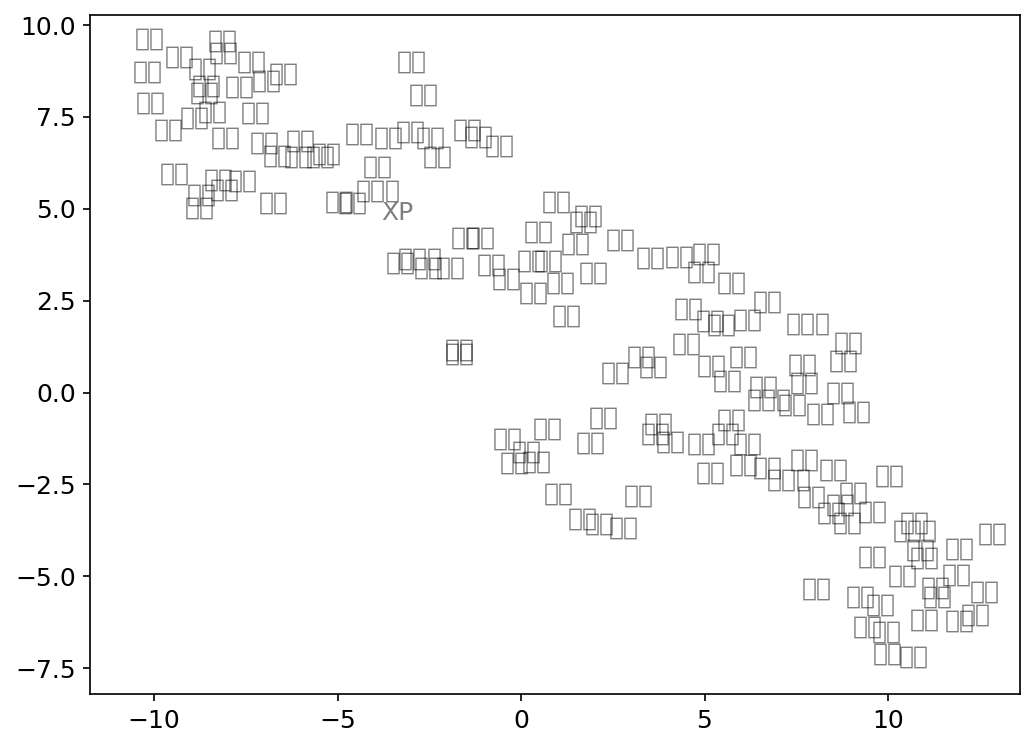

In [43]:
# fig = plt.gcf()
# fig.set_size_inches(24, 16)
plt.figure(figsize=(8, 6), dpi=150) 
# plt.figure(figsize=(8, 6), dpi=300) 
plt.rcParams.update({'font.size': 12})
plt.rcParams['font.family'] = ['Heiti TC']
for i in range(len(points)):
    x = points[i][0]
    y = points[i][1]
    plt.scatter(x, y, alpha=0)
    plt.annotate(words[i], xy=(x, y), alpha=0.5)
plt.axis('equal')

## plot by bokeh
- https://stackoverflow.com/questions/40450943/adding-labels-to-a-bokeh-plot
- https://docs.bokeh.org/en/latest/docs/user_guide/annotations.html


In [44]:
import pandas as pd
import numpy as np
df = pd.DataFrame(points, columns = ['x', 'y']) # 要化成dataframe
df['label'] = words
df

x         y label
0    -3.380378  8.813668    蒙牛
1   -10.587442  8.539642    不錯
2    -9.850566  5.757698    可以
3    -9.175164  4.833361    沒有
4   -10.010258  6.953948    酒店
..         ...       ...   ...
145   7.264806  0.566335    孩子
146  10.601742 -6.365593    實用
147  11.468910 -5.153225    還算
148   9.576540 -7.299575    呵呵
149  10.587199 -4.676703    相當

[150 rows x 3 columns]

In [46]:
# !pip install bokeh
# !pip install jupyter_bokeh
from bokeh.models import ColumnDataSource, Label, LabelSet, Range1d
from bokeh.plotting import figure, output_file, show
from bokeh.io import output_notebook
output_notebook()

  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
    Preparing wheel metadata: started
    Preparing wheel metadata: finished with status 'done'
Failed to build jupyter-bokeh


  ERROR: Command errored out with exit status 1:
   command: 'C:\Users\Sing-hao Ku\anaconda3\python.exe' 'C:\Users\Sing-hao Ku\anaconda3\lib\site-packages\pip\_vendor\pep517\_in_process.py' build_wheel 'C:\Users\SING-H~1\AppData\Local\Temp\tmpvgjjbxc2'
       cwd: C:\Users\Sing-hao Ku\AppData\Local\Temp\pip-install-wq8lrgge\jupyter-bokeh_7a31b5f9225e4f5cb07b1c0d90b62a17
  Complete output (80 lines):
  running bdist_wheel
  running jsdeps
  running handle_files
  running build
  running build_py
  creating build
  creating build\lib
  creating build\lib\jupyter_bokeh
  copying jupyter_bokeh\widgets.py -> build\lib\jupyter_bokeh
  copying jupyter_bokeh\_version.py -> build\lib\jupyter_bokeh
  copying jupyter_bokeh\__init__.py -> build\lib\jupyter_bokeh
  running egg_info
  writing jupyter_bokeh.egg-info\PKG-INFO
  writing dependency_links to jupyter_bokeh.egg-info\dependency_links.txt
  writing requirements to jupyter_bokeh.egg-info\requires.txt
  writing top-level names to jupyter_bokeh

Loading BokehJS ...


  copying build\lib\jupyter_bokeh\labextension\static\534.a9082b1a87c4f389e139.js.LICENSE.txt -> build\bdist.win-amd64\wheel\.\jupyter_bokeh\labextension\static
  copying build\lib\jupyter_bokeh\labextension\static\809.dc36b734dbd5fc902f01.js -> build\bdist.win-amd64\wheel\.\jupyter_bokeh\labextension\static
  copying build\lib\jupyter_bokeh\labextension\static\remoteEntry.1e8f19418ca61e387e42.js -> build\bdist.win-amd64\wheel\.\jupyter_bokeh\labextension\static
  copying build\lib\jupyter_bokeh\labextension\static\style.js -> build\bdist.win-amd64\wheel\.\jupyter_bokeh\labextension\static
  creating build\bdist.win-amd64\wheel\jupyter_bokeh\nbextension
  copying build\lib\jupyter_bokeh\nbextension\extension.js -> build\bdist.win-amd64\wheel\.\jupyter_bokeh\nbextension
  copying build\lib\jupyter_bokeh\nbextension\index.js -> build\bdist.win-amd64\wheel\.\jupyter_bokeh\nbextension
  copying build\lib\jupyter_bokeh\nbextension\index.js.map -> build\bdist.win-amd64\wheel\.\jupyter_bokeh

In [47]:
p = figure(title = "w2v")
p.circle(df["x"], df["y"], fill_alpha=0.2, size=10)
labels = LabelSet(x='x', y='y', text='label', 
                  x_offset=5, y_offset=5, 
                  source=ColumnDataSource(df), render_mode='canvas')
p.add_layout(labels)
show(p)